Back to the main [Index](index.ipynb)

# Postprocessing tools for Many-Body calculations with ABINIT

The $GW$ code saves the results of the calculation in the `SIGRES.nc` file produced at the end of the `SIGMA` run (`optdriver` 4).
The Bethe-Salpeter code saves the optical spectra in the `MDF.nc` file. 
In this notebook, we will explain how to use `abipy` and `matplotlib` to visualize the results produce by the Many-Body code. 
Let's start by importing the basic modules we'll use for this tutorial.

In [1]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import warnings 
warnings.filterwarnings("ignore")  # Ignore warnings

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook
import abipy.data as abidata

# This line tells the notebook to show plots inside of the notebook
%matplotlib notebook

## How to visualize QP corrections  

In [2]:
sigres = abilab.abiopen(abidata.ref_file("tgw1_9o_DS4_SIGRES.nc"))
print(sigres)

================================= File Info =================================
Name: tgw1_9o_DS4_SIGRES.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs
Size: 1005.34 kb
Access Time: Fri Feb  9 01:03:34 2018
Modification Time: Wed Nov  8 01:06:20 2017
Change Time: Wed Nov  8 01:06:20 2017

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.823046   3.823046   3.823046
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True

============================== Kohn-Sham bands ==============================
Number of electrons: 8.0, Fermi level: 6.236 [eV]
nsppol: 1, nkpt: 6, mband: 100, nspinor: 1, nspden: 1
smearing scheme: , tsmear_eV: 1.088, occopt: 1
Direct gap:
    Energy: 2.513 [eV]
    Initial state: sp

<IPython.core.display.Javascript object>


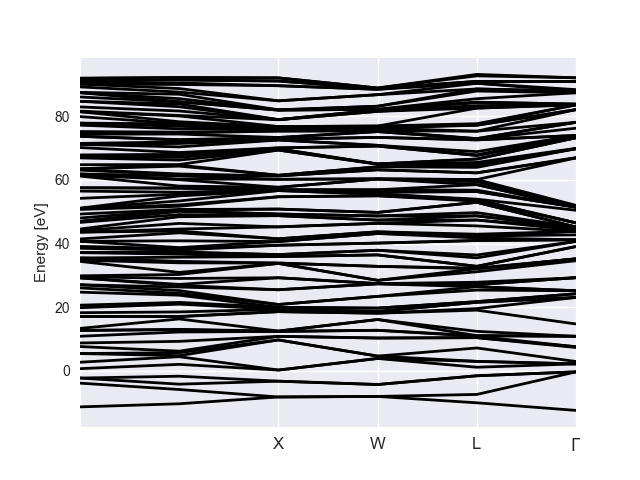

In [3]:
sigres.ebands.plot();

<IPython.core.display.Javascript object>


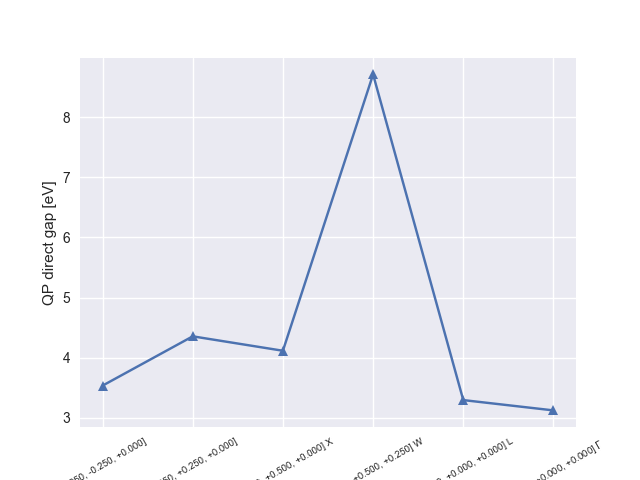

In [4]:
sigres.plot_qpgaps();

<IPython.core.display.Javascript object>


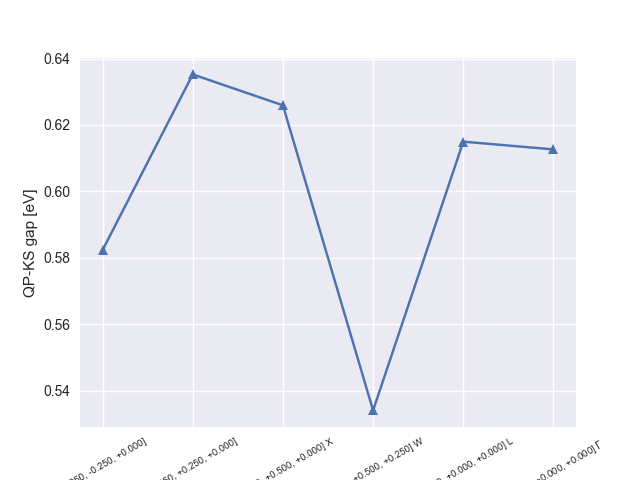

In [5]:
sigres.plot_qpgaps(plot_qpmks=True);

<IPython.core.display.Javascript object>


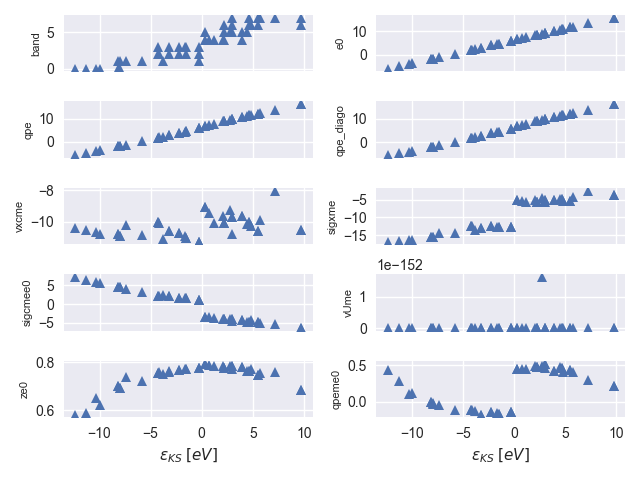

In [6]:
sigres.plot_qps_vs_e0(tight_layout=True);

<IPython.core.display.Javascript object>


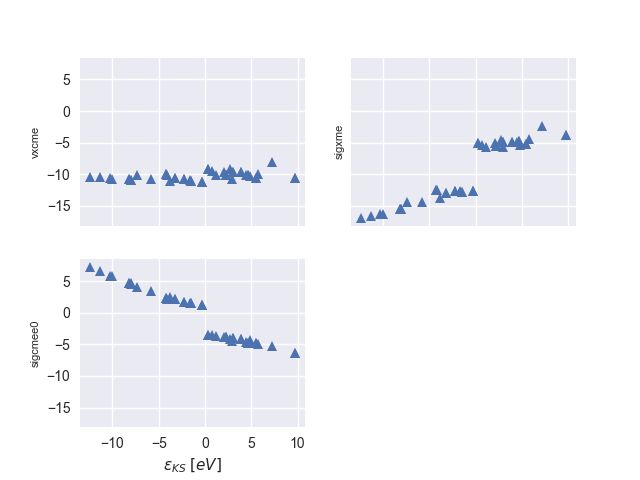

In [7]:
sigres.plot_qps_vs_e0(with_fields=["vxcme", "sigxme", "sigcmee0"], sharey=True);

<IPython.core.display.Javascript object>


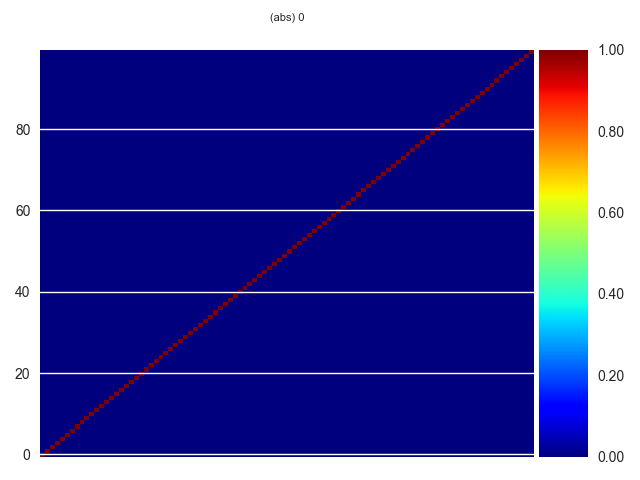

In [8]:
sigres.plot_eigvec_qp(spin=0, kpoint=0);

<IPython.core.display.Javascript object>


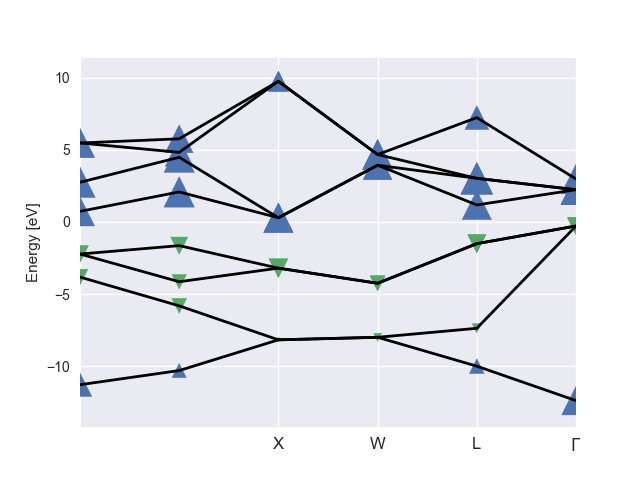

In [9]:
sigres.plot_ksbands_with_qpmarkers(fact=1000);

<IPython.core.display.Javascript object>


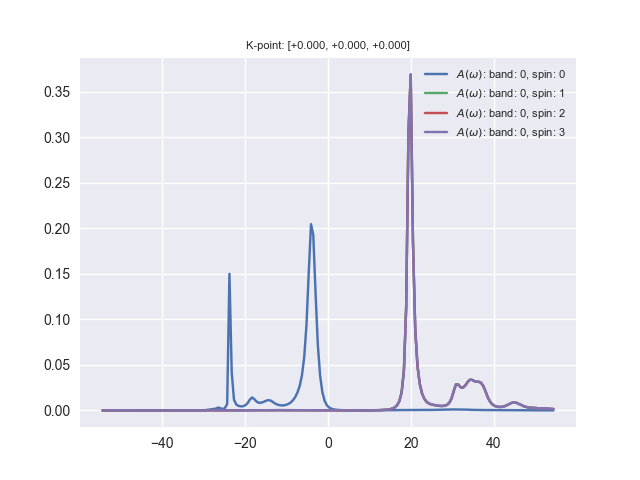

In [10]:
# This examples shows how to plot the G0W0 spectral functions A(w)
# at the gamma point, for the first band). See lesson tgw2_4

# Open the file with the GW results
al_sigres = abilab.abiopen(abidata.ref_file("al_g0w0_sigmaw_SIGRES.nc"))

# Plot A(w) for the first spin, the gamma point, and bands in [0,1,2,3]
al_sigres.plot_spectral_functions();

## Convergence of the QP corrections  

This example shows how to visualize the convergence of the QP results stored in the `SIGRES` produced by the $GW$ code (sigma run).

In [11]:
# List of SIGRES files computed with different values of nband.
filenames = [
    "si_g0w0ppm_nband10_SIGRES.nc",
    "si_g0w0ppm_nband20_SIGRES.nc",
    "si_g0w0ppm_nband30_SIGRES.nc",
]

filepaths = [abidata.ref_file(fname) for fname in filenames]

robot = abilab.SigresRobot.from_files(filepaths)

<IPython.core.display.Javascript object>


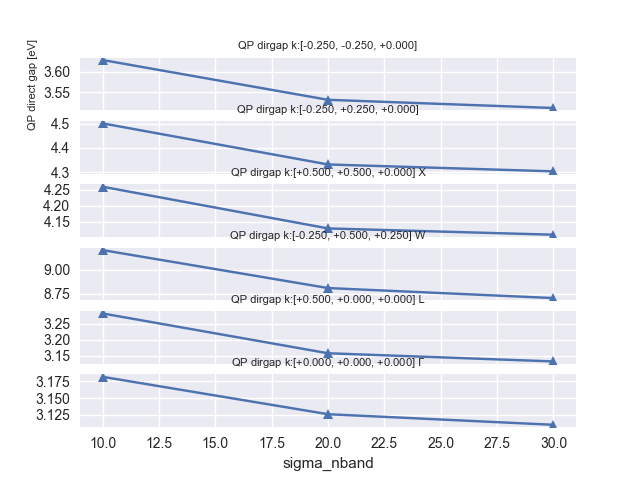

In [12]:
robot.plot_qpgaps_convergence(sortby="sigma_nband");

<IPython.core.display.Javascript object>


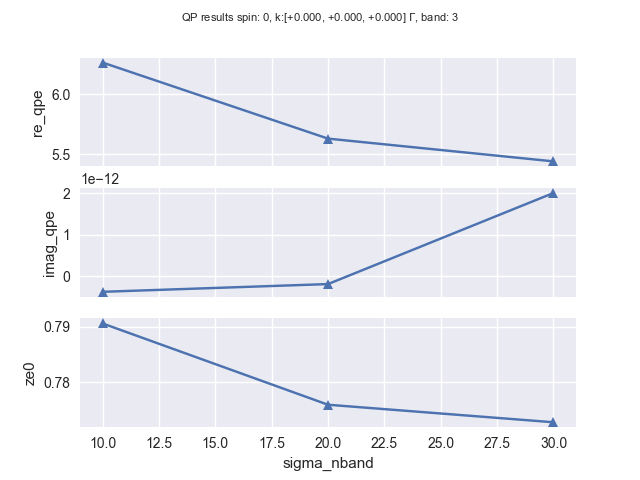

In [13]:
robot.plot_qpdata_conv_skb(spin=0, kpoint=(0, 0, 0), band=3, sortby="sigma_nband");

<IPython.core.display.Javascript object>


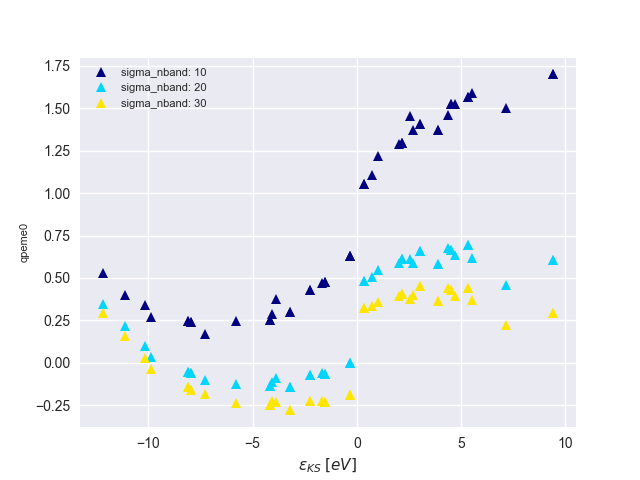

In [14]:
robot.plot_qpfield_vs_e0("qpeme0", sortby="sigma_nband");

In [15]:
#robot.get_qpgaps_dataframe()